# Criando os nomes

In [28]:
import pandas as pd

In [29]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [30]:
print("Quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [31]:
frames = [nomes_f, nomes_m]

In [32]:
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198

In [33]:
nomes = pd.concat(frames)['nome'].to_frame()

In [34]:
nomes.sample(5)

,nome
8,LUIZ
83,RENAN
64,ROBSON
127,JULIANO
10,SANDRA


# Incluindo ID dos alunos

In [36]:
import numpy as np
np.random.seed(123)

In [35]:
total_alunos = len(nomes)
total_alunos

400

In [37]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [38]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [39]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [40]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [41]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [42]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# Criando a tabela cursos

In [43]:
!pip3 install html5lib
!pip3 install lxml

In [44]:
import html5lib
import pandas as pd

In [45]:
url = 'http://tabela-cursos.herokuapp.com/index.html'


In [46]:
cursos = pd.read_html(url)

In [47]:
cursos = cursos[0]

In [48]:
type(cursos)

pandas.core.frame.DataFrame

In [49]:
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [50]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [51]:
cursos.head(5)

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [52]:
cursos['id'] = cursos.index +1

In [53]:
cursos.head(5)

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [54]:
cursos = cursos.set_index('id')

In [55]:
cursos.head(5)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [26]:
import numpy as np

In [60]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)

In [61]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
67,HENRIQUE,64,@dominiodoemail.com.br,henrique@dominiodoemail.com.br,4
102,MARILENE,149,@dominiodoemail.com.br,marilene@dominiodoemail.com.br,1
49,ALEX,337,@dominiodoemail.com.br,alex@dominiodoemail.com.br,1
8,PATRICIA,379,@servicodoemail.com,patricia@servicodoemail.com,5
89,JEAN,89,@dominiodoemail.com.br,jean@dominiodoemail.com.br,2


In [62]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


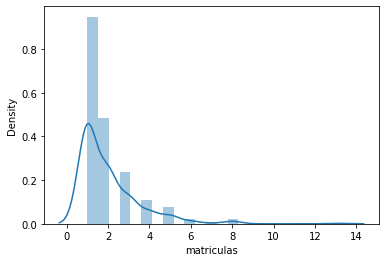

In [63]:
sns.distplot(nomes.matriculas)

In [65]:
nomes.matriculas.value_counts()

1     198
2     101
3      50
4      23
5      16
8       5
6       5
13      1
7       1
Name: matriculas, dtype: int64

# Selecionando Cursos

In [66]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br,2
18,RAIMUNDO,70,@dominiodoemail.com.br,raimundo@dominiodoemail.com.br,1
8,PATRICIA,379,@servicodoemail.com,patricia@servicodoemail.com,5
3,ANTONIA,156,@dominiodoemail.com.br,antonia@dominiodoemail.com.br,1
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com,1


In [67]:
todas_matriculas = []

In [69]:
x = np.random.rand(20)
prob = x / sum(x)

In [ ]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])
matriculas.head(5)

In [71]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno' : 'quantidade_alunos'})

,quantidade_alunos,nome_do_curso
id_curso,,
1,49,Lógica de programação
2,42,Java para Web
3,21,C# para Web
4,4,Ruby on Rails
5,42,Cursos de Python
6,25,PHP com MySql
7,60,.NET para web
8,53,Novas integrações com Java
9,4,TDD com Java


In [72]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno' : 'quantidade_alunos'})

In [74]:
matriculas_por_curso.head(5)

,quantidade_alunos,nome_do_curso
id_curso,,
1,49,Lógica de programação
2,42,Java para Web
3,21,C# para Web
4,4,Ruby on Rails
5,42,Cursos de Python


# Saída em diferentes formatos

In [105]:
matriculas_por_curso.head(5)

,quantidade_alunos,nome_do_curso
id_curso,,
1,49,Lógica de programação
2,42,Java para Web
3,21,C# para Web
4,4,Ruby on Rails
5,42,Cursos de Python


In [106]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [107]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade_alunos":{"1":49,"2":42,"3":21,"4":4,"5":42,"6":25,"7":60,"8":53,"9":4,"10":59,"11":66,"12":65,"13":21,"14":67,"15":89,"16":58,"17":66,"18":3,"19":13,"20":5},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [108]:
matriculas_html = matriculas_por_curso.to_html()

In [109]:
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>49</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>42</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>21</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>4</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>42</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>25</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>60</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>53</td>\n      <td>Novas integrações com Java</td>\n    